In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now() #Pega data atual
start = datetime(end.year-15, end.month, end.day) #Data de hoje 15 anos atras
stock = 'BTC-USD'
stock_data = yf.download(stock, start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705
2025-01-07,96922.703125,102712.484375,96132.875000,102248.851562,58685738547
2025-01-08,95043.523438,97258.320312,92525.843750,96924.164062,63875859171
2025-01-09,92484.039062,95349.718750,91220.843750,95043.484375,62777261693


In [5]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3768.000000,3768.000000,3768.000000,3768.000000,3.768000e+03
mean,19770.630205,20190.746014,19284.750534,19747.511097,1.864108e+10
std,22420.813732,22881.215175,21888.407079,22393.767853,2.036980e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1231.867523,1251.442474,1214.077545,1231.295044,4.207255e+08
50%,9375.181152,9540.444336,9231.213867,9366.200195,1.469595e+10
75%,30819.798828,31832.351562,30193.673340,30788.449707,2.986810e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3768 entries, 2014-09-17 to 2025-01-09
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3768 non-null   float64
 1   (High, BTC-USD)    3768 non-null   float64
 2   (Low, BTC-USD)     3768 non-null   float64
 3   (Open, BTC-USD)    3768 non-null   float64
 4   (Volume, BTC-USD)  3768 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.6 KB


In [7]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
#Preço Fechamento
closing_price = stock_data[["Close"]]

In [9]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-01-05,98314.960938
2025-01-06,102078.085938
2025-01-07,96922.703125


<function matplotlib.pyplot.show(close=None, block=None)>

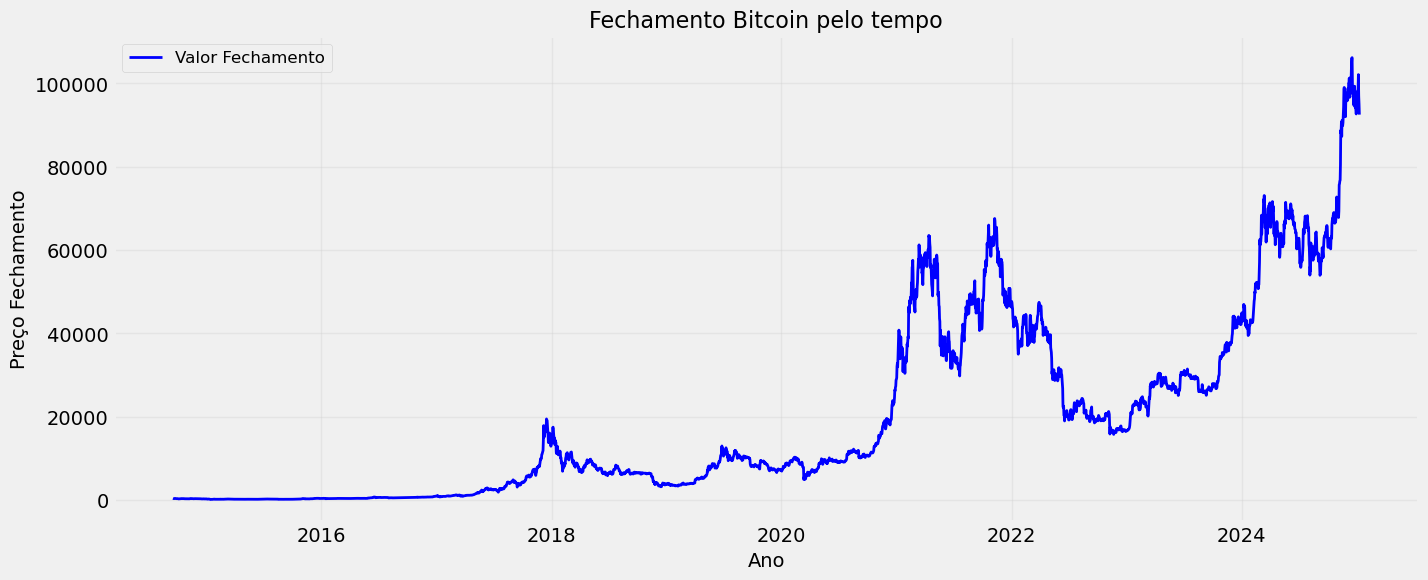

In [10]:
#Grafico Preço Fechamento
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Valor Fechamento', color = 'blue', linewidth = 2)
plt.title("Fechamento Bitcoin pelo tempo", fontsize = 16)
plt.xlabel("Ano", fontsize = 14)
plt.ylabel("Preço Fechamento", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [11]:
#Media movel
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#moving average for 5 day => null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [15]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\agger\AppData\Local\Temp\ipykernel_17888\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\agger\AppData\Local\Temp\ipykernel_17888\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

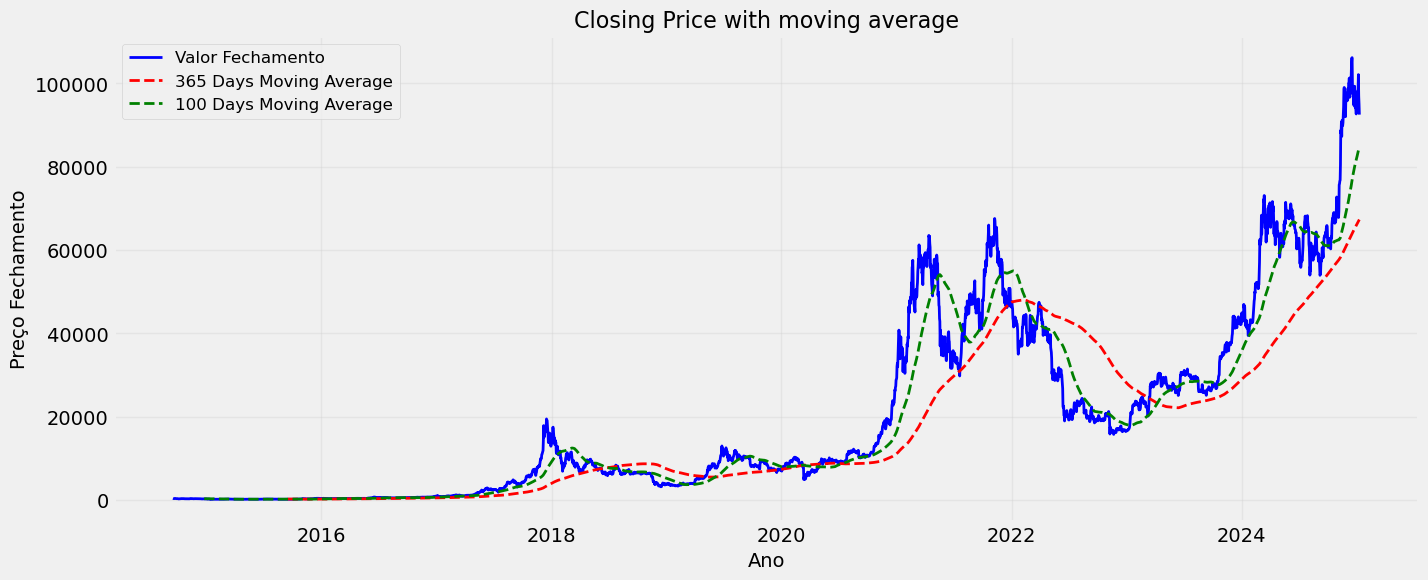

In [16]:
#Grafico Preço Fechamento
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Valor Fechamento', color = 'blue', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle = "--", linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green', linestyle = "--", linewidth = 2)
plt.title("Closing Price with moving average", fontsize = 16)
plt.xlabel("Ano", fontsize = 14)
plt.ylabel("Preço Fechamento", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [17]:
#LSTM -> Long short term memory
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [18]:
len(scaled_data)

3768

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
#Prepare data for Lstm
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [22]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test , y_test = x_data[train_size:] , y_data[train_size:]

In [23]:
model = Sequential([
        LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)),
        LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\agger\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train , y_train, batch_size = 5, epochs =10)

Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - loss: 0.0019
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - loss: 2.9066e-04
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - loss: 2.6892e-04
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 1.4671e-04
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - loss: 1.5621e-04
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - loss: 1.3611e-04
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 1.0168e-04
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 1.0624e-04
Epoch 9/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - loss: 9.5177e-05
Epoch 10/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - loss: 1.0744e-04


In [25]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

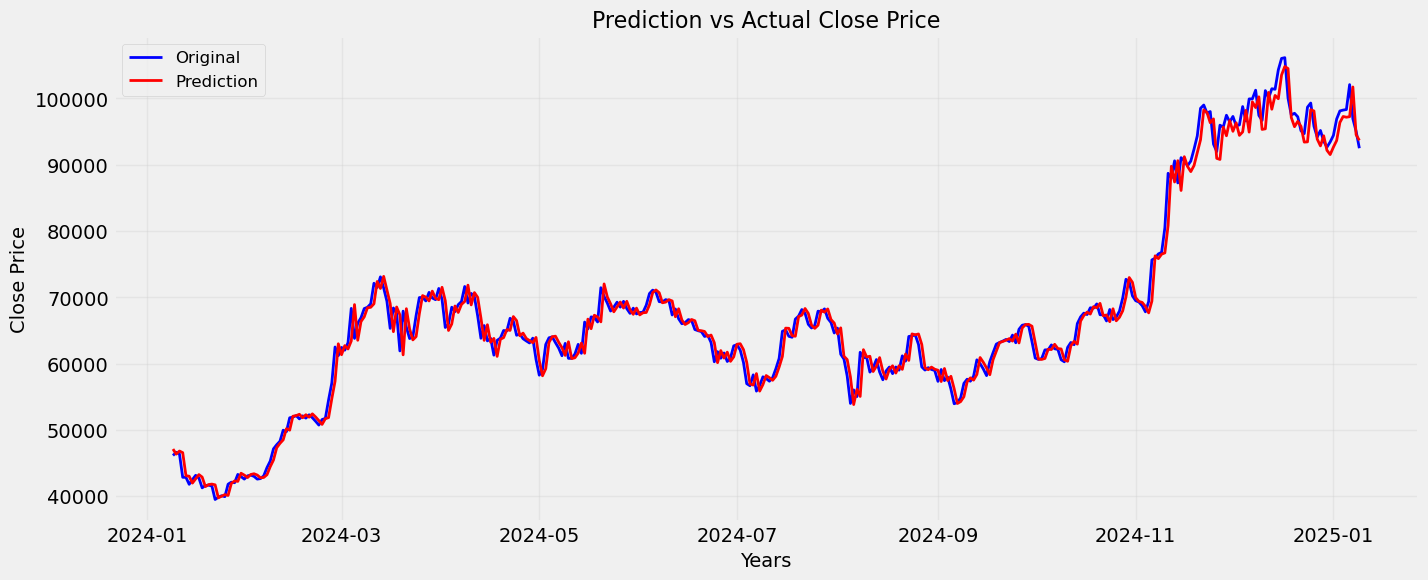

In [26]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red', linewidth = 2)


plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [56]:
#Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions = []
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1: , :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [60]:
future_predictions

[array([[90974.44]], dtype=float32),
 array([[89729.83]], dtype=float32),
 array([[88565.34]], dtype=float32),
 array([[87462.03]], dtype=float32),
 array([[86431.58]], dtype=float32),
 array([[85482.586]], dtype=float32),
 array([[84617.734]], dtype=float32),
 array([[83834.75]], dtype=float32),
 array([[83128.04]], dtype=float32),
 array([[82490.164]], dtype=float32)]

<function matplotlib.pyplot.show(close=None, block=None)>

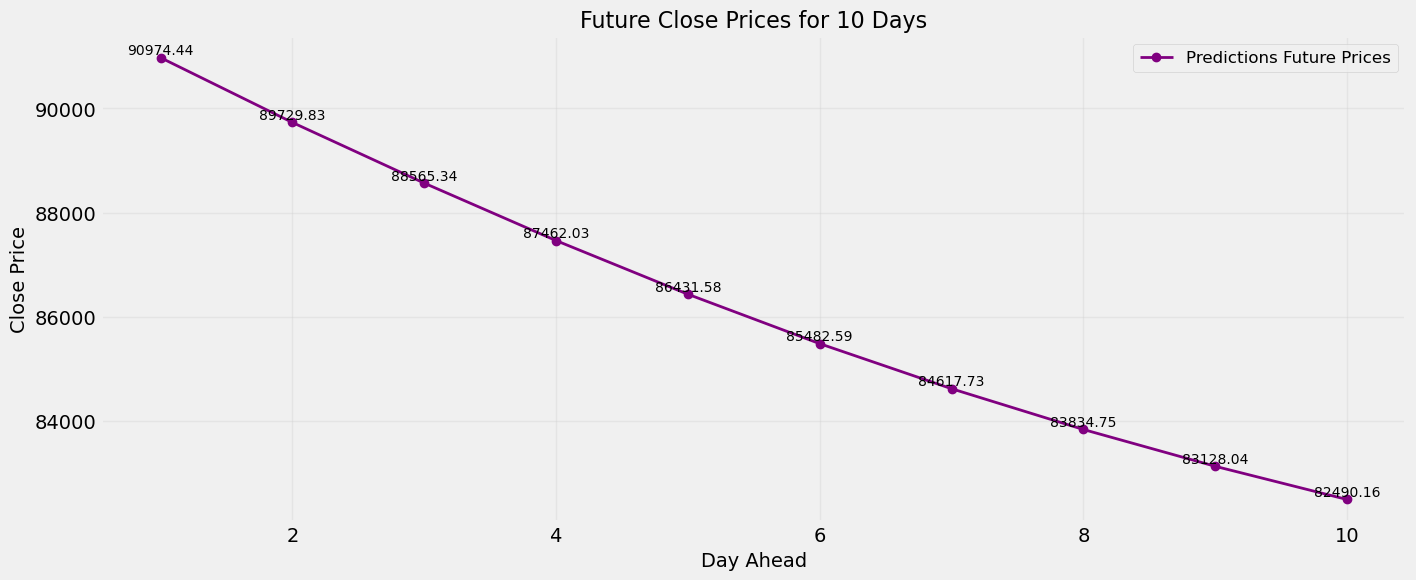

In [66]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker = "o", label = 'Predictions Future Prices', color = 'purple', linewidth = 2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [68]:
model.save("model.keras")